In [1]:
import numpy as np
import random
import os
import tensorflow as tf
from preprocessor import Preprocessor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from test_models import load_model, test_random_line

In [2]:
# preprocessor_path = "../data/preprocessors/preprocessor_20_smallest_files_100lpc_20ws_BERTencx16.zip"
preprocessor_path = "../data/preprocessors/preprocessor_3_newest_files_100lpc_20ws_BERTencx16.zip"
pp = Preprocessor.load(preprocessor_path)
print(pp.data.states_counts)
X, y = pp.data.as_xy_arrays()

defaultdict(<class 'int'>, {np.int64(0): 100, np.int64(3): 100, np.int64(2): 100, np.int64(1): 30})


In [3]:
model_path = "../models/vary_lstm/lstm_1x50_drop0.0_rec0.0_lr0.001_bs32_ep1000_earlystpval_loss10True_20250624_145128.keras"
# model_path = "../models/lstm_2x50_drop0.1_rec0.1_lr0.001_bs32_ep1000_earlystpval_accuracy50True_20250708_112046.keras"



# model_path = "../models/vary_lstm/lstm_50x100_drop0.0_rec0.0_lr0.001_bs32_ep1000_earlystpval_loss10True_20250630_062218.keras"
# model_path = "../models/vary_lstm/lstm_1x100_drop0.0_rec0.0_lr0.001_bs32_ep1000_earlystpval_loss10True_20250630_062041.keras"
#m_name = "transformer_8x128_heads4_ffdim256_drop0_lr0.001_bs32_ep1000_earlystpval_loss10True_20250619_140737"
#model_path = f"../models/vary_transformer_parameters/{m_name}.keras"

model = load_model(model_path)


In [4]:
X0 = X[y == 0]
y0 = y[y == 0]

X1 = X[y == 1]
y1 = y[y == 1]

X2 = X[y == 2]
y2 = y[y == 2]

X3 = X[y == 3]
y3 = y[y == 3]

In [11]:
def test_augmented_data(x, actual_y, augmentation_source, augmentation_idx=-1):
    flat = augmentation_source.reshape(-1, augmentation_source.shape[-1])
    aug = flat[np.random.randint(0, flat.shape[0])]
    
    x_augmented = x.copy()
    x_augmented[augmentation_idx] = aug

    aug_pred = model.predict(np.array([x_augmented]))
    aug_y = np.argmax(aug_pred, axis=1)

    reg_pred = model.predict(np.array([x]))
    reg_y = np.argmax(reg_pred, axis=1)

    print(f"augmented data prediction: {aug_y}")
    print(f"actual data prediction: {reg_y}")
    print(f"actual y: {actual_y}")
    print()


for i in range(100):
    j = np.random.randint(0, len(X[0]))
    test_augmented_data(X3[i], y3[i], X0, j)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
augmented data prediction: [3]
actual data prediction: [3]
actual y: 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
augmented data prediction: [3]
actual data prediction: [3]
actual y: 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
augmented data prediction: [3]
actual data prediction: [3]
actual y: 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
augmented data prediction: [3]
actual data prediction: [3]
actual y: 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
augmented data prediction: [3]
actual data prediction: [3]
actual y: 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
augmented data prediction: [3]
actual data prediction: [3]
actual y: 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
augmented data prediction: [3]
actu

In [16]:
# augment data
X_augmented = np.copy(X)
for i in range(len(X)):
    flat = X.reshape(-1, X.shape[-1])
    aug = flat[np.random.randint(0, flat.shape[0])]
    
    j = np.random.randint(0, len(X_augmented[i]))
    X_augmented[i][-1] = aug

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
Accuracy : 0.3182
Precision: 0.3125
Recall   : 0.3182
F1 Score : 0.2795


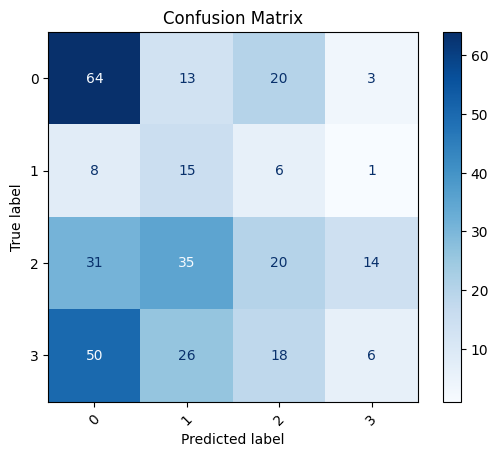

In [17]:
# Get predictions
y_pred_probs = model.predict(X_augmented)
y_pred = y_pred_probs.argmax(axis=1)  # For softmax outputs

# True labels
y_true = y.argmax(axis=1) if y.ndim > 1 else y

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# Compute and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [18]:
# Get predictions
y_pred_probs = model.predict(X)
y_pred = y_pred_probs.argmax(axis=1)  # For softmax outputs

# True labels
y_true = y.argmax(axis=1) if y.ndim > 1 else y

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy : 0.8606
Precision: 0.8857
Recall   : 0.8606
F1 Score : 0.8683


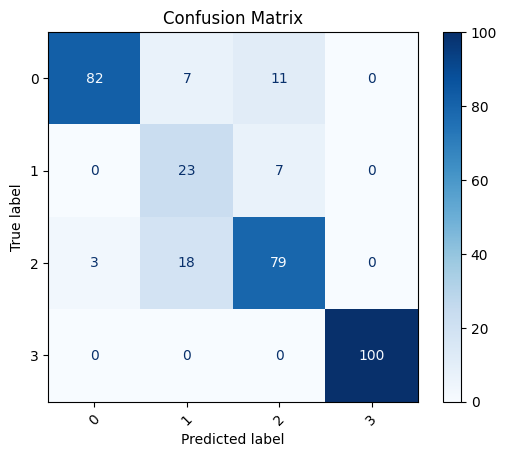

In [19]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()
